<a href="https://colab.research.google.com/github/LuisFGG91/AplicacionesModiles/blob/main/Proyecto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Logo_DuocUC.svg/2560px-Logo_DuocUC.svg.png' width=50%, height=20%>

# Modelos de regresión: "Counter Strike: GO"

---
## *Realizado por:*
*   Luis Guerrero G.
---


<h1>INTRODUCCIÓN </h1>

<h3>¿Qué es Counter Strike: Global Offensive (CS:GO)?</h3>

<p>Counter Strike: Global Offensive, comúnmente conocido como CS:GO, es un juego de disparos en primera persona táctico y competitivo. Este juego, desarrollado por Valve y Hidden Path Entertainment, es la cuarta entrega de la serie Counter Strike. CS:GO destaca por su jugabilidad centrada en equipos, donde la precisión, la estrategia y la rapidez de reflejos son fundamentales para el éxito.</p>

<h3>¿Cómo se juega CS:GO?</h3>

<p>CEn CS:GO, dos equipos, terroristas y contra-terroristas, compiten en una serie de rondas con objetivos específicos. Los terroristas buscan plantar una bomba en sitios designados o eliminar al equipo contrario, mientras que los contra-terroristas tratan de prevenir la plantación de la bomba, desactivarla si se ha plantado, o eliminar a los terroristas. El juego se desarrolla en diversos mapas, cada uno con sus características y desafíos únicos. Las partidas son intensas y requieren tanto habilidad individual como trabajo en equipo.</p>

<h3>¿Por qué CS:GO es tan popular?</h3>

<p>La popularidad de CS:GO se debe a varios factores. Primero, su balance entre accesibilidad y profundidad táctica lo hace atractivo tanto para jugadores casuales como para profesionales. Además, la comunidad de CS:GO es una de las más activas y apasionadas en el mundo de los esports, con torneos que atraen a millones de espectadores de todo el mundo. La combinación de competitividad, habilidad y estrategia, junto con su naturaleza de juego en equipo, hace que CS:GO no solo sea un juego emocionante de jugar, sino también de ver.</p>

Descripcion de los datos

1. **Map**: Nombre del mapa donde se jugó la partida.
2. **Team**: Nombre del equipo al que pertenece el jugador.
3. **InternalTeamId**: Identificador del equipo al que pertenece el jugador.
4. **MatchId**: Identificador de la partida.
5. **RoundId**: Identificador de la ronda.
6. **MatchWinner**: Indica si el jugador ganó o no la partida.
7. **RoundWinner**: Indica si el jugador ganó o no la ronda analizada.
8. **Survived**: Indica si el jugador sobrevivió o no a la partida.
9. **AbnormalMatch**: Indica si la partida tuvo un error por conexión de red.
10. **TimeAlive**: Tiempo en segundos que el jugador estuvo vivo durante el juego.
11. **TravelledDistance**: Distancia viajada por el jugador durante la partida.
12. **RLethalGrenadesThrown**: Cantidad de granadas letales lanzadas.
13. **RNonLethalGrenadesThrown**: Cantidad de granadas no letales lanzadas.
14. **PrimaryAssaultRifle**: Porcentaje de uso de rifle de asalto como arma primaria.
15. **PrimarySniperRifle**: Porcentaje de uso de rifle francotirador como arma primaria.
16. **PrimarySMG**: Porcentaje de uso de subametralladora como arma primaria.
17. **PrimaryHeavy**: Porcentaje de uso de arma pesada como arma primaria.
18. **PrimaryPistol**: Porcentaje de uso de pistola como arma primaria.
19. **MatchAssists**: Asistencias durante la partida.
20. **RoundAssists**: Asistencias durante la ronda.
21. **MatchKills**: Muertes durante la partida.
22. **RoundKills**: Muertes durante la ronda.
23. **MatchFlankKills**: Muertes de flanco durante la partida.
24. **RoundFlankKills**: Muertes de flanco durante la ronda.
25. **MatchHeadShots**: Tiros en la cabeza durante la partida.
26. **RoundHeadShots**: Tiros en la cabeza durante la ronda.
27. **RoundStartingEquipmentValue**: Valor del equipamiento al inicio de la ronda.
28. **TeamStartingEquipmentValue**: Valor promedio del equipamiento del equipo al inicio de la ronda.


In [ ]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Suprimir advertencias
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn.axisgrid")


# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento y modelado
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Evaluación
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Analisis exploratorio.


In [ ]:
filename = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTsgTICr7d2tmT8pL4zQ2G8pWc2Ef_eYxohd5sNOLrlL1NyQWfVGtgytyQgbcHF2R2It7zp8ybGU0tO/pub?gid=296100992&single=true&output=csv'
df = pd.read_csv(filename, error_bad_lines=False)
df.sample(10)

<ipython-input-2-ca93ca920ed0>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(filename, error_bad_lines=False)
<ipython-input-2-ca93ca920ed0>:2: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, error_bad_lines=False)


,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
73462,116705,de_inferno,CounterTerrorist,2,482,3,False,False,False,False,...,0,0,0,0,5700,29950,3,2,1,2
72842,115625,de_nuke,Terrorist,2,477,21,False,True,True,False,...,0,0,0,0,4700,16350,16,5,2,8
54528,81990,de_inferno,Terrorist,1,338,10,False,False,False,False,...,1,0,0,0,4800,25750,2,0,1,1
11144,17275,de_dust2,CounterTerrorist,2,73,3,FALSE,False,True,False,...,1,0,1,0,4350,25900,1,0,0,1
66014,105677,de_nuke,Terrorist,2,434,19,True,True,True,False,...,0,0,0,0,300,1700,11,1,4,4
21493,32534,de_inferno,CounterTerrorist,1,135,26,FALSE,False,True,False,...,2,0,0,0,5500,27700,21,4,1,9
36826,52188,de_dust2,Terrorist,2,217,15,False,False,False,False,...,0,0,0,0,700,3550,9,1,3,5
59542,90814,de_mirage,Terrorist,1,374,3,True,True,False,False,...,1,0,1,0,5450,23700,2,0,0,2
75947,120270,de_mirage,CounterTerrorist,1,496,17,False,True,False,False,...,0,0,0,0,3300,21700,4,0,3,3
44039,64381,de_nuke,CounterTerrorist,1,265,19,True,True,False,False,...,0,1,0,0,5200,26800,9,3,1,2


In [ ]:
# Dimension del la data.
print(f"Dimension: {df.shape[0]} x {df.shape[1]}")
print(f"Cantidad de filas: {df.shape[0]}")
print(f"Cantidad de columnas: {df.shape[1]}")

Dimension: 79157 x 30
Cantidad de filas: 79157
Cantidad de columnas: 30


In [ ]:
# Informacion de la data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   79157 non-null  int64 
 1   Map                          79157 non-null  object
 2   Team                         79155 non-null  object
 3   InternalTeamId               79157 non-null  int64 
 4   MatchId                      79157 non-null  int64 
 5   RoundId                      79157 non-null  int64 
 6   RoundWinner                  79157 non-null  object
 7   MatchWinner                  79156 non-null  object
 8   Survived                     79157 non-null  bool  
 9   AbnormalMatch                79157 non-null  bool  
 10  TimeAlive                    79157 non-null  object
 11  TravelledDistance            79157 non-null  object
 12  RLethalGrenadesThrown        79157 non-null  int64 
 13  RNonLethalGrenadesThrown     79

In [ ]:
#Variables numéricas del dataframe
variables_numericas= df.select_dtypes(include=np.number).columns.to_list()
variables_numericas

['Unnamed: 0',
 'InternalTeamId',
 'MatchId',
 'RoundId',
 'RLethalGrenadesThrown',
 'RNonLethalGrenadesThrown',
 'RoundKills',
 'RoundAssists',
 'RoundHeadshots',
 'RoundFlankKills',
 'RoundStartingEquipmentValue',
 'TeamStartingEquipmentValue',
 'MatchKills',
 'MatchFlankKills',
 'MatchAssists',
 'MatchHeadshots']

In [ ]:
#Variables categóricas del dataframe
variables_categoricas= df.select_dtypes(exclude=np.number).columns.to_list()
variables_categoricas

['Map',
 'Team',
 'RoundWinner',
 'MatchWinner',
 'Survived',
 'AbnormalMatch',
 'TimeAlive',
 'TravelledDistance',
 'PrimaryAssaultRifle',
 'PrimarySniperRifle',
 'PrimaryHeavy',
 'PrimarySMG',
 'PrimaryPistol',
 'FirstKillTime']

In [ ]:
# Filas únicas de #
valores_unicos = df['Map'].unique()
valores_unicos

array(['de_inferno', 'de_nuke', 'de_mirage', 'de_dust2'], dtype=object)

In [ ]:
valores_unicos = df['Team'].unique()
valores_unicos

#Se necesita filtrar

array(['Terrorist', 'CounterTerrorist', nan], dtype=object)

In [ ]:
valores_unicos = df['RoundWinner'].unique()
valores_unicos

#Se necesita filtrar

In [ ]:
valores_unicos = df['MatchWinner'].unique()
valores_unicos
#Se necesita filtrar

array([True, False, nan], dtype=object)

In [ ]:
valores_unicos = df['Survived'].unique()
valores_unicos

array([False,  True])

In [ ]:
valores_unicos = df['AbnormalMatch'].unique()
valores_unicos
#valor a eliminar ya que no sirve para nuestro objetivo

array([False])

In [ ]:
valores_unicos = df['TimeAlive'].unique()
valores_unicos

array(['51.120.248.995.704.500', '4.348.662.552.266.170',
       '3.735.469.847.054.540', ..., '5.914.717.797.783.930',
       '42.582.842.797.783.900', '8.004.793.109.418.280'], dtype=object)

In [ ]:
valores_unicos = df['TravelledDistance'].unique()
valores_unicos

array(['10.083.140.737.457.000,00', '60.960.883.184.688.400,00',
       '5.642.252.383.582.750,00', ..., '6.005.168.938.274.500,00',
       '27.987.628.542.398.100,00', '9.867.724.708.696.010,00'],
      dtype=object)

In [ ]:
valores_unicos = df['PrimaryAssaultRifle'].unique()
valores_unicos

array(['0.0', '1.0', '762.135.922.330.097,00', ...,
       '3.345.132.743.362.830,00', '7.242.888.402.625.820,00',
       '9.505.263.157.894.730,00'], dtype=object)

In [ ]:
valores_unicos = df['PrimarySniperRifle'].unique()
valores_unicos

array(['0.0', '1.0', '2.378.640.776.699.020,00', ...,
       '6.654.867.256.637.160,00', '27.571.115.973.741.700,00',
       '49.473.684.210.526.300,00'], dtype=object)

In [ ]:
valores_unicos = df['PrimaryHeavy'].unique()
valores_unicos

array(['0.0', '1.0', '9.401.840.490.797.540,00',
       '8.357.988.165.680.470,00', '6.141.947.224.749.770,00',
       '9.403.751.674.854.840,00', '6.345.933.562.428.400,00',
       '918.581.746.552.856,00', '8.869.179.600.886.910,00',
       '7.642.585.551.330.790,00', '354.127.284.183.995,00',
       '19.559.902.200.489,00', '10.871.130.309.575.200,00',
       '8.671.875,00', '8.560.311.284.046.690,00',
       '5.838.198.498.748.950,00', '6.677.440.206.851.970,00',
       '4.029.017.857.142.850,00', '9.650.266.745.702.420,00',
       '847.576.211.894.053,00', '8.712.070.128.118.670,00',
       '7.697.690.692.792.160,00', '94.239.162.059.936,00',
       '8.761.271.950.640.720,00', '9.562.272.016.675.350,00',
       '9.521.228.545.618.790,00', '907.871.720.116.618,00',
       '6.141.015.921.152.380,00', '4.912.280.701.754.380,00',
       '9.300.380.228.136.880,00', '45.112.781.954.887.200,00',
       '7.936.507.936.507.930,00', '18.450.184.501.845.000,00',
       '3.852.080.123.266.560

In [ ]:
valores_unicos = df['PrimarySMG'].unique()
valores_unicos

array(['0.0', '1.0', '15.352.697.095.435.600,00',
       '6.444.444.444.444.440,00', '2.301.410.541.945.060,00',
       '6.871.794.871.794.870,00', '12.738.853.503.184.700,00',
       '9.079.189.686.924.490,00', '18.023.617.153.511.400,00',
       '11.111.111.111.111.100,00', '9.970.260.223.048.320,00',
       '988.235.294.117.647,00', '5.701.530.612.244.890,00',
       '9.668.449.197.860.960,00', '4.934.535.932.499.270,00',
       '4.860.088.365.243.000,00', '15.151.515.151.515.100,00',
       '225.752.508.361.204,00', '13.916.500.994.035.700,00',
       '6.936.026.936.026.930,00', '3.374.193.548.387.090,00',
       '4.771.863.117.870.720,00', '8.601.521.357.519.010,00',
       '9.545.454.545.454.540,00', '15.861.027.190.332.300,00',
       '5.783.385.909.568.870,00', '5.017.205.781.142.460,00',
       '4.244.350.282.485.870,00', '23.598.435.462.842.200,00',
       '6.474.308.300.395.250,00', '7.326.007.326.007.320,00',
       '7.027.027.027.027.020,00', '27.131.782.945.736.400,00',
 

In [ ]:
valores_unicos = df['FirstKillTime'].unique()
valores_unicos

array(['0.0', '373.547', '5.112.025', ..., '59.147.180.000.000.000',
       '28.714.119', '438.720.474'], dtype=object)

In [ ]:
# Verificar si hay valores nulos.
df.isnull().any()

Unnamed: 0                     False
Map                            False
Team                            True
InternalTeamId                 False
MatchId                        False
RoundId                        False
RoundWinner                    False
MatchWinner                     True
Survived                       False
AbnormalMatch                  False
TimeAlive                      False
TravelledDistance              False
RLethalGrenadesThrown          False
RNonLethalGrenadesThrown       False
PrimaryAssaultRifle            False
PrimarySniperRifle             False
PrimaryHeavy                   False
PrimarySMG                     False
PrimaryPistol                  False
FirstKillTime                  False
RoundKills                     False
RoundAssists                   False
RoundHeadshots                 False
RoundFlankKills                False
RoundStartingEquipmentValue    False
TeamStartingEquipmentValue     False
MatchKills                     False
M

In [ ]:
# Contando valores nulos.
df.isnull().sum()

Unnamed: 0                     0
Map                            0
Team                           2
InternalTeamId                 0
MatchId                        0
RoundId                        0
RoundWinner                    0
MatchWinner                    1
Survived                       0
AbnormalMatch                  0
TimeAlive                      0
TravelledDistance              0
RLethalGrenadesThrown          0
RNonLethalGrenadesThrown       0
PrimaryAssaultRifle            0
PrimarySniperRifle             0
PrimaryHeavy                   0
PrimarySMG                     0
PrimaryPistol                  0
FirstKillTime                  0
RoundKills                     0
RoundAssists                   0
RoundHeadshots                 0
RoundFlankKills                0
RoundStartingEquipmentValue    0
TeamStartingEquipmentValue     0
MatchKills                     0
MatchFlankKills                0
MatchAssists                   0
MatchHeadshots                 0
dtype: int

In [ ]:
# Estadistica de los datos numéricos.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,79157.0,60570.193640,36436.598386,600.0,30830.0,56720.0,90639.0,123779.0
InternalTeamId,79157.0,1.500006,0.500003,1.0,1.0,2.0,2.0,2.0
MatchId,79157.0,250.525033,149.557804,4.0,128.0,236.0,373.0,511.0
RoundId,79157.0,12.765517,7.432837,1.0,6.0,12.0,19.0,36.0
RLethalGrenadesThrown,79157.0,0.498667,0.597985,0.0,0.0,0.0,1.0,4.0
RNonLethalGrenadesThrown,79157.0,1.258057,1.184909,0.0,0.0,1.0,2.0,6.0
RoundKills,79157.0,0.671349,0.881798,0.0,0.0,0.0,1.0,5.0
RoundAssists,79157.0,0.146178,0.385601,0.0,0.0,0.0,0.0,4.0
RoundHeadshots,79157.0,0.301553,0.578843,0.0,0.0,0.0,0.0,5.0
RoundFlankKills,79157.0,0.095633,0.320641,0.0,0.0,0.0,0.0,5.0


In [ ]:
#Estadistica de las todas variables.
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,79157.0,NaN,NaN,NaN,60570.19364,36436.598386,600.0,30830.0,56720.0,90639.0,123779.0
Map,79157,4,de_inferno,28869,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Team,79155,2,Terrorist,39591,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternalTeamId,79157.0,NaN,NaN,NaN,1.500006,0.500003,1.0,1.0,2.0,2.0,2.0
MatchId,79157.0,NaN,NaN,NaN,250.525033,149.557804,4.0,128.0,236.0,373.0,511.0
RoundId,79157.0,NaN,NaN,NaN,12.765517,7.432837,1.0,6.0,12.0,19.0,36.0
RoundWinner,79157,5,False,23195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MatchWinner,79156,2,False,42017,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Survived,79157,2,False,47214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AbnormalMatch,79157,1,False,79157,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Observaciones;


1. Se necesita filtrar AbnormalMatch MatchWinner RoundWinner Team

# Procesamiento de la data.

In [ ]:
df.duplicated().sum()

0

## Eliminando "Unnamed: 0"

In [ ]:
df = df.drop("Unnamed: 0", axis=1)

## Eliminando "AbnormalMatch"

In [ ]:
df = df.drop("AbnormalMatch", axis=1)

## Limpiando Variable MatchWinner

In [ ]:
# Elimina los valores NaN en la columna 'RoundWinner'
df = df.dropna(subset=['MatchWinner'])

In [ ]:
valores_unicos = df['MatchWinner'].unique()
valores_unicos

array([True, False], dtype=object)

## Limpiando Variable Team

In [ ]:
# Elimina los valores NaN en la columna 'Team'
df = df.dropna(subset=['Team'])

In [ ]:
valores_unicos = df['Team'].unique()
valores_unicos

array(['Terrorist', 'CounterTerrorist'], dtype=object)

## Normalizando RoundWinner

In [ ]:
# Normalizar la columna 'RoundWinner' a valores booleanos
df['RoundWinner'] = df['RoundWinner'].apply(lambda x: x.upper() == 'TRUE' if isinstance(x, str) else bool(x))

In [ ]:
valores_unicos = df['RoundWinner'].unique()
valores_unicos

array([False,  True])

## Transformando variables categoricas a numéricas.

In [ ]:
# Lista de columnas categóricas
columnas_categoricas = ['Map', 'Team', 'RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch',
                         'PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimaryHeavy', 'PrimarySMG', 'FirstKillTime',
                       'TravelledDistance','TimeAlive','PrimaryPistol']

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Aplicar Label Encoding a cada columna categórica
for columna in columnas_categoricas:
    if columna in df.columns:  # Asegurarse de que la columna esté en el DataFrame
        df[columna] = label_encoder.fit_transform(df[columna])


In [ ]:
df.dtypes

Map                            int64
Team                           int64
InternalTeamId                 int64
MatchId                        int64
RoundId                        int64
RoundWinner                    int64
MatchWinner                    int64
Survived                       int64
TimeAlive                      int64
TravelledDistance              int64
RLethalGrenadesThrown          int64
RNonLethalGrenadesThrown       int64
PrimaryAssaultRifle            int64
PrimarySniperRifle             int64
PrimaryHeavy                   int64
PrimarySMG                     int64
PrimaryPistol                  int64
FirstKillTime                  int64
RoundKills                     int64
RoundAssists                   int64
RoundHeadshots                 int64
RoundFlankKills                int64
RoundStartingEquipmentValue    int64
TeamStartingEquipmentValue     int64
MatchKills                     int64
MatchFlankKills                int64
MatchAssists                   int64
M

# Matriz de correlación.

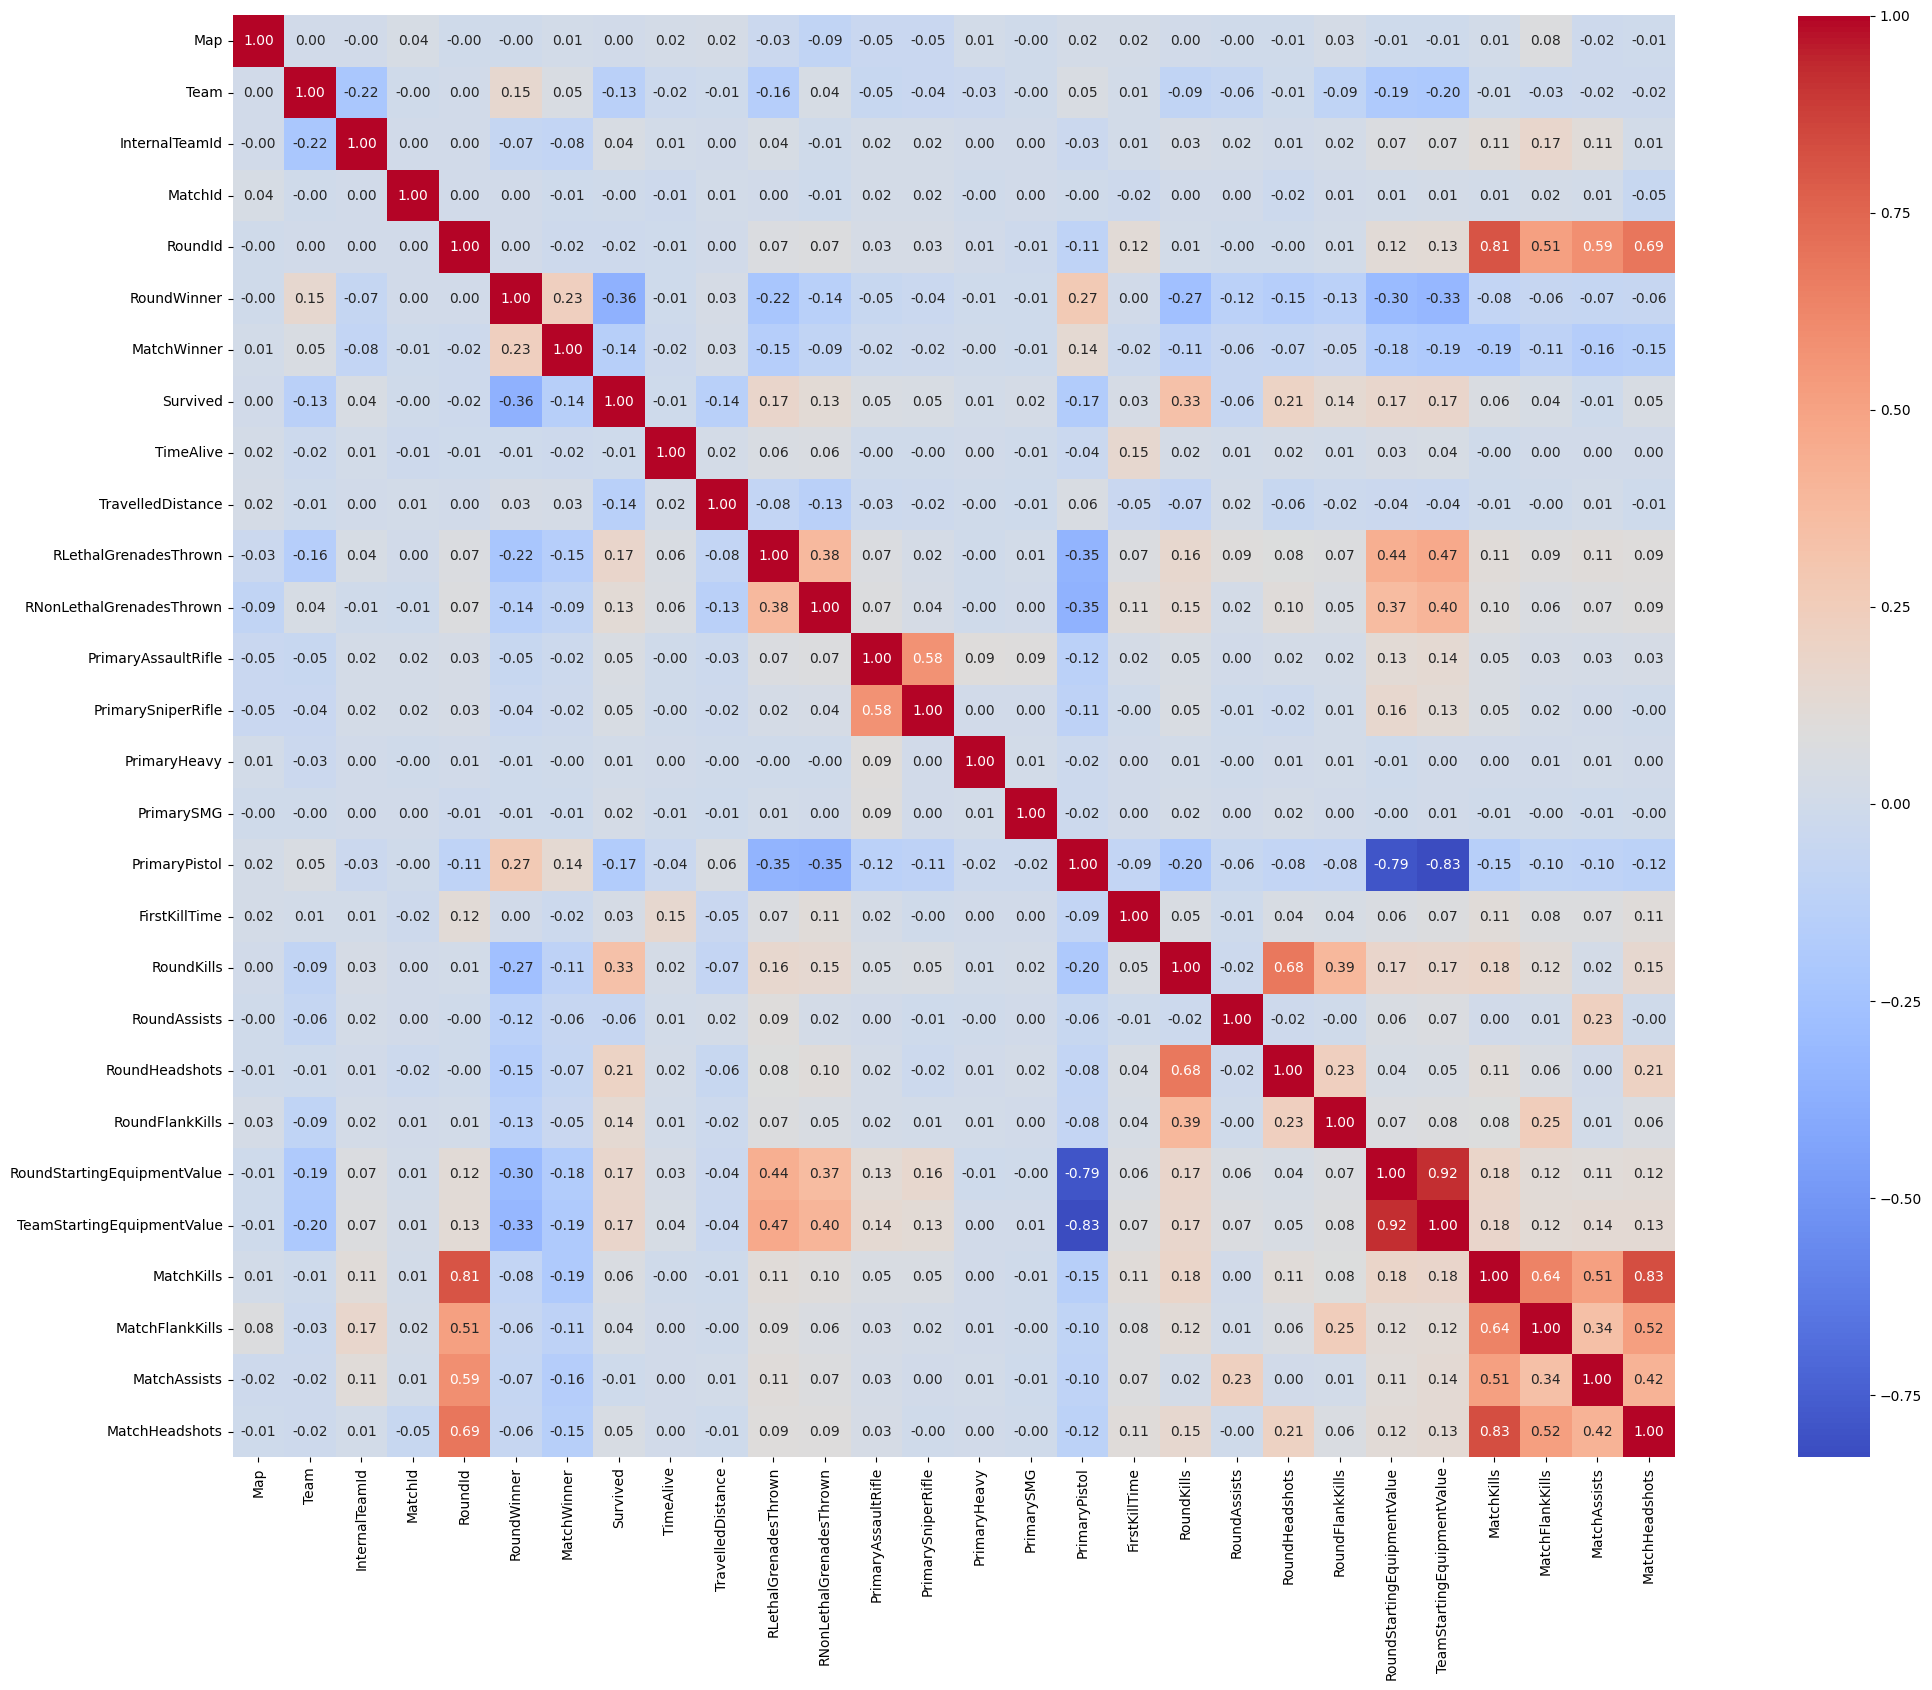

In [ ]:
# Mapa de Correlación
corr = df.corr(method ='pearson')
plt.figure(figsize=(25,17))  # Tamaño del gráfico
sns.heatmap(data=corr,square=True, annot=True,cmap='coolwarm', fmt=".2f");
plt.tight_layout()


In [ ]:
cs_go_data_description = {
    'Map': 'Nombre del mapa donde se jugó la partida.',
    'Team': 'Nombre del equipo al que pertenece el jugador.',
    'InternalTeamId': 'Identificador del equipo al que pertenece el jugador.',
    'MatchId': 'Identificador de la partida.',
    'RoundId': 'Identificador de la ronda.',
    'MatchWinner': 'Indica si el jugador ganó o no la partida.',
    'RoundWinner': 'Indica si el jugador ganó o no la ronda analizada.',
    'Survived': 'Indica si el jugador sobrevivió o no a la partida.',
    'AbnormalMatch': 'Indica si la partida tuvo un error por conexión de red.',
    'TimeAlive': 'Tiempo en segundos que el jugador estuvo vivo durante el juego.',
    'TravelledDistance': 'Distancia viajada por el jugador durante la partida.',
    'RLethalGrenadesThrown': 'Cantidad de granadas letales lanzadas.',
    'RNonLethalGrenadesThrown': 'Cantidad de granadas no letales lanzadas.',
    'PrimaryAssaultRifle': 'Porcentaje de uso de rifle de asalto como arma primaria.',
    'PrimarySniperRifle': 'Porcentaje de uso de rifle francotirador como arma primaria.',
    'PrimarySMG': 'Porcentaje de uso de subametralladora como arma primaria.',
    'PrimaryHeavy': 'Porcentaje de uso de arma pesada como arma primaria.',
    'PrimaryPistol': 'Porcentaje de uso de pistola como arma primaria.',
    'FirstKillTime': 'Tiempo transcurrido desde el inicio de la ronda o partida hasta el primer asesinato (kill) registrado.',
    'MatchAssists': 'Asistencias durante la partida.',
    'RoundAssists': 'Asistencias durante la ronda.',
    'MatchKills': 'Muertes durante la partida.',
    'RoundKills': 'Muertes durante la ronda.',
    'MatchFlankKills': 'Muertes de flanco durante la partida.',
    'RoundFlankKills': 'Muertes de flanco durante la ronda.',
    'MatchHeadshots': 'Tiros en la cabeza durante la partida.',
    'RoundHeadshots': 'Tiros en la cabeza durante la ronda.',
    'RoundStartingEquipmentValue': 'Valor del equipamiento al inicio de la ronda.',
    'TeamStartingEquipmentValue': 'Valor promedio del equipamiento del equipo al inicio de la ronda.',
}

In [ ]:
correlacion = df.corr()['TeamStartingEquipmentValue'].sort_values(ascending=True)
correlacion

PrimaryPistol                 -0.828600
RoundWinner                   -0.327825
Team                          -0.203237
MatchWinner                   -0.190397
TravelledDistance             -0.036318
Map                           -0.009854
PrimaryHeavy                   0.002731
PrimarySMG                     0.005382
MatchId                        0.014345
TimeAlive                      0.036279
RoundHeadshots                 0.047932
RoundAssists                   0.067008
InternalTeamId                 0.073309
FirstKillTime                  0.073561
RoundFlankKills                0.076405
MatchFlankKills                0.122449
PrimarySniperRifle             0.126519
RoundId                        0.127408
MatchHeadshots                 0.132261
MatchAssists                   0.135518
PrimaryAssaultRifle            0.139203
RoundKills                     0.168590
Survived                       0.173214
MatchKills                     0.178514
RNonLethalGrenadesThrown       0.403796


# Graficos de la data con variable objetivo.

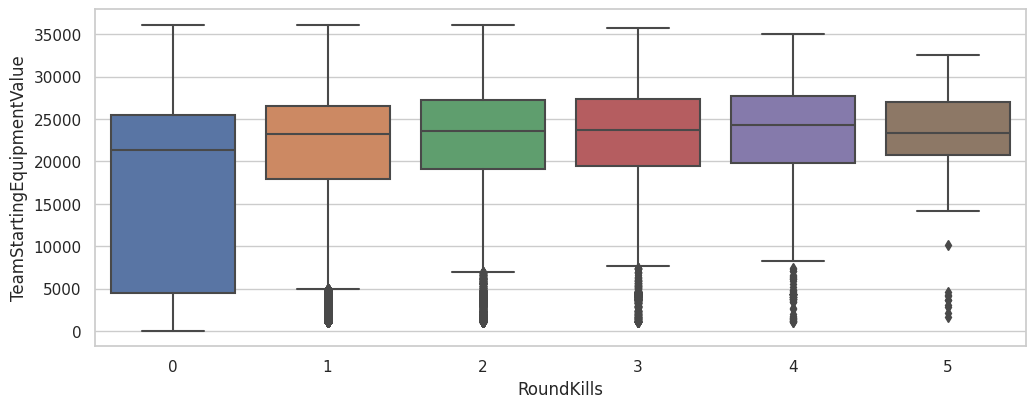

In [ ]:
sns.set(style="whitegrid")

# Definir las dimensiones de la figura
plt.figure(figsize=(20, 20))

# Crear 10 gráficos significativos

# 1. Relación entre 'RoundKills' y 'RoundWinner'
plt.subplot(5, 2, 1)
sns.boxplot(x='RoundKills', y='TeamStartingEquipmentValue', data=df)

# Ajustar el layout de los subplots para evitar la superposición
plt.tight_layout()
plt.show()


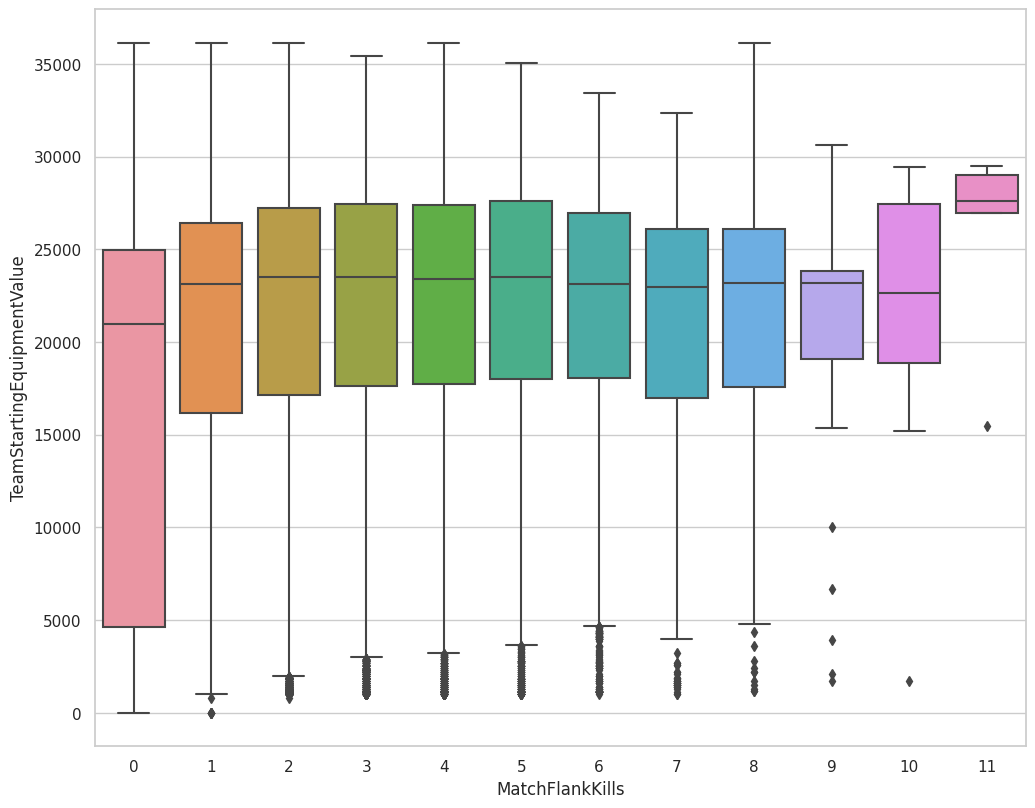

In [ ]:
# 2. Relación entre 'MatchFlankKills' y 'TeamStartingEquipmentValue'
# Definir las dimensiones de la figura
plt.figure(figsize=(20, 40))
plt.subplot(5, 2, 2)
sns.boxplot(x='MatchFlankKills', y='TeamStartingEquipmentValue', data=df)
# Ajustar el layout de los subplots para evitar la superposición
plt.tight_layout()
plt.show()


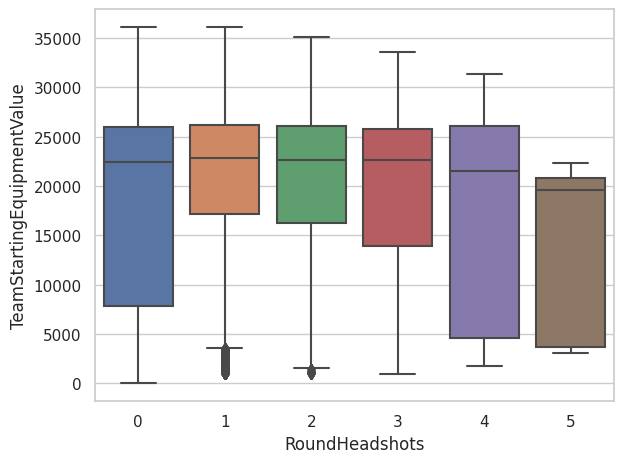

In [ ]:
# 3. Relación entre 'RoundHeadshots' y 'TeamStartingEquipmentValue'
sns.boxplot(x='RoundHeadshots', y='TeamStartingEquipmentValue', data=df)
plt.tight_layout()
plt.show()

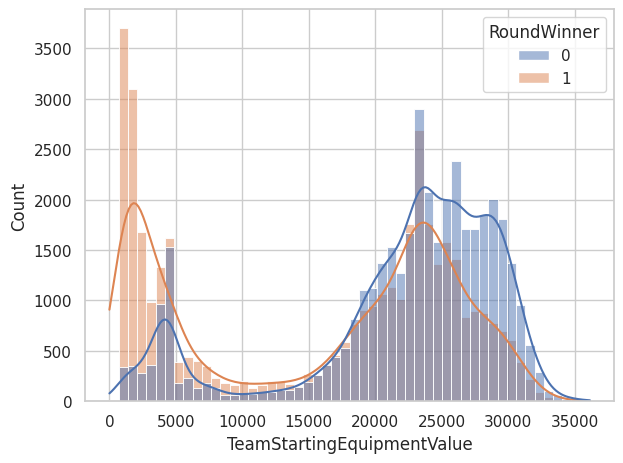

In [ ]:
# 4. Distribución de 'TeamStartingEquipmentValue' para cada 'RoundWinner'
sns.histplot(data=df, x='TeamStartingEquipmentValue', hue='RoundWinner', kde=True)
# Ajustar el layout de los subplots para evitar la superposición
plt.tight_layout()
plt.show()


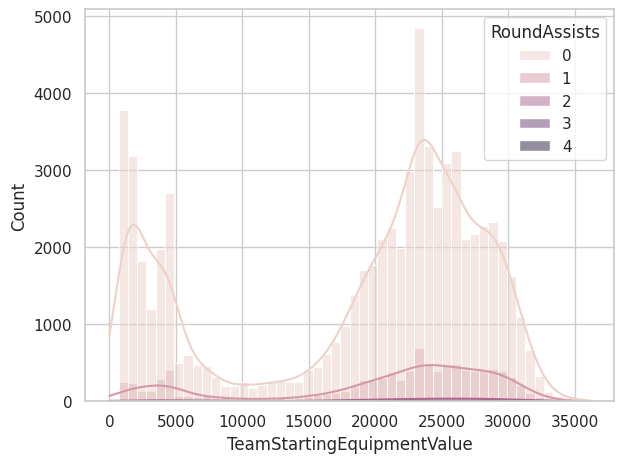

In [ ]:
# 5. Distribución de 'TeamStartingEquipmentValue' para cada 'RoundAssists'
sns.histplot(data=df, x='TeamStartingEquipmentValue', hue='RoundAssists', kde=True)
# Ajustar el layout de los subplots para evitar la superposición
plt.tight_layout()
plt.show()

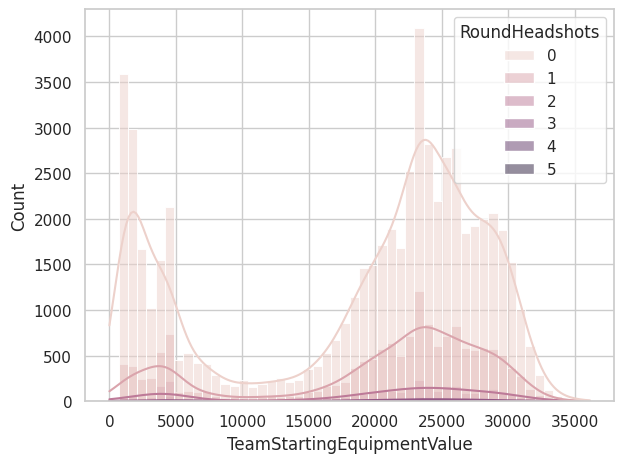

In [ ]:
# 6. Distribución de 'TeamStartingEquipmentValue' para cada 'RoundHeadshots'
sns.histplot(data=df, x='TeamStartingEquipmentValue', hue='RoundHeadshots', kde=True)
# Ajustar el layout de los subplots para evitar la superposición
plt.tight_layout()
plt.show()

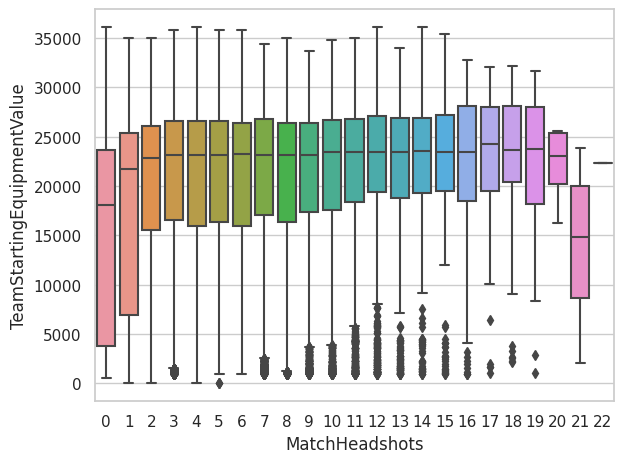

In [ ]:

# 7. Relación entre 'MatchWinner' y 'MatchWinner'
sns.boxplot(x='MatchHeadshots', y='TeamStartingEquipmentValue', data=df)
# Ajustar el layout de los subplots para evitar la superposición
plt.tight_layout()
plt.show()


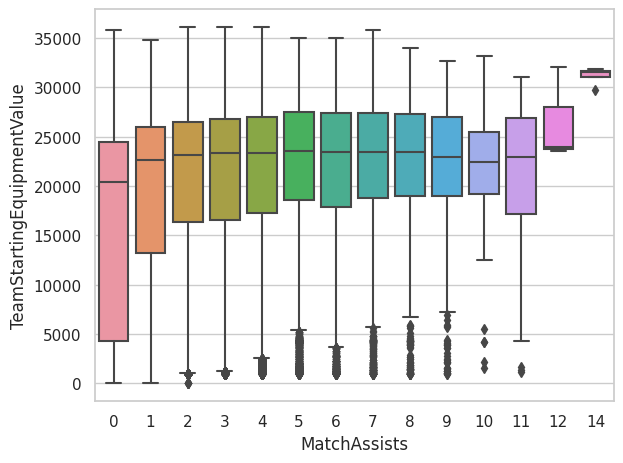

In [ ]:
# 8. Relación entre 'MatchWinner' y 'MatchWinner'
sns.boxplot(x='MatchAssists', y='TeamStartingEquipmentValue', data=df)
# Ajustar el layout de los subplots para evitar la superposición
plt.tight_layout()
plt.show()


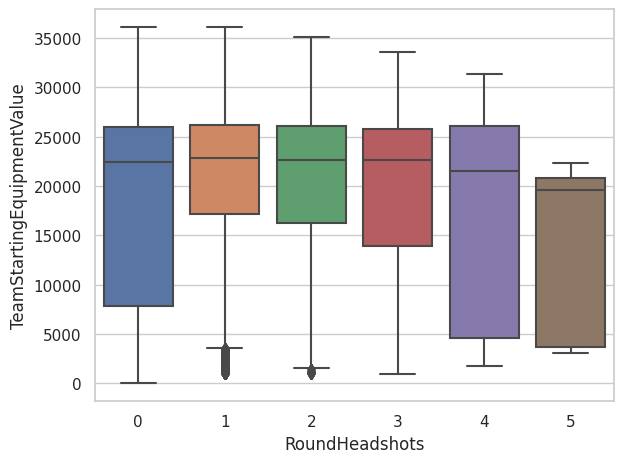

In [ ]:
# 9. Relación entre 'MatchWinner' y 'TeamStartingEquipmentValue'
sns.boxplot(x='RoundHeadshots', y='TeamStartingEquipmentValue', data=df)
# Ajustar el layout de los subplots para evitar la superposición
plt.tight_layout()
plt.show()

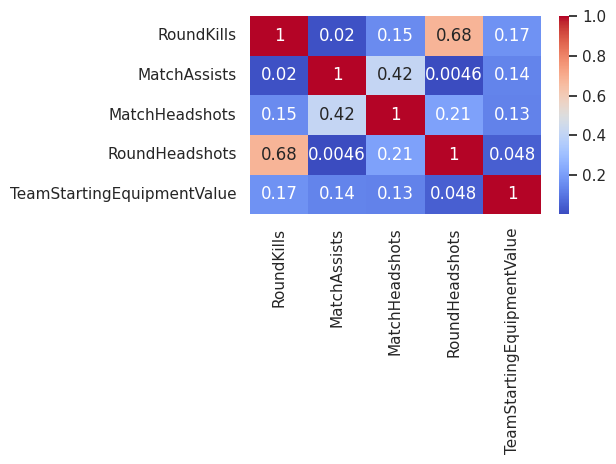

In [ ]:
# 10. Correlación de 'RoundKills', 'RoundAssists', 'RoundHeadshots' ,'MatchHeadshots' con 'TeamStartingEquipmentValue'
correlation_matrix = df[['RoundKills', 'MatchAssists', 'MatchHeadshots','RoundHeadshots','TeamStartingEquipmentValue']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# Ajustar el layout de los subplots para evitar la superposición
plt.tight_layout()
plt.show()

Histogramas para distribuciones de variables


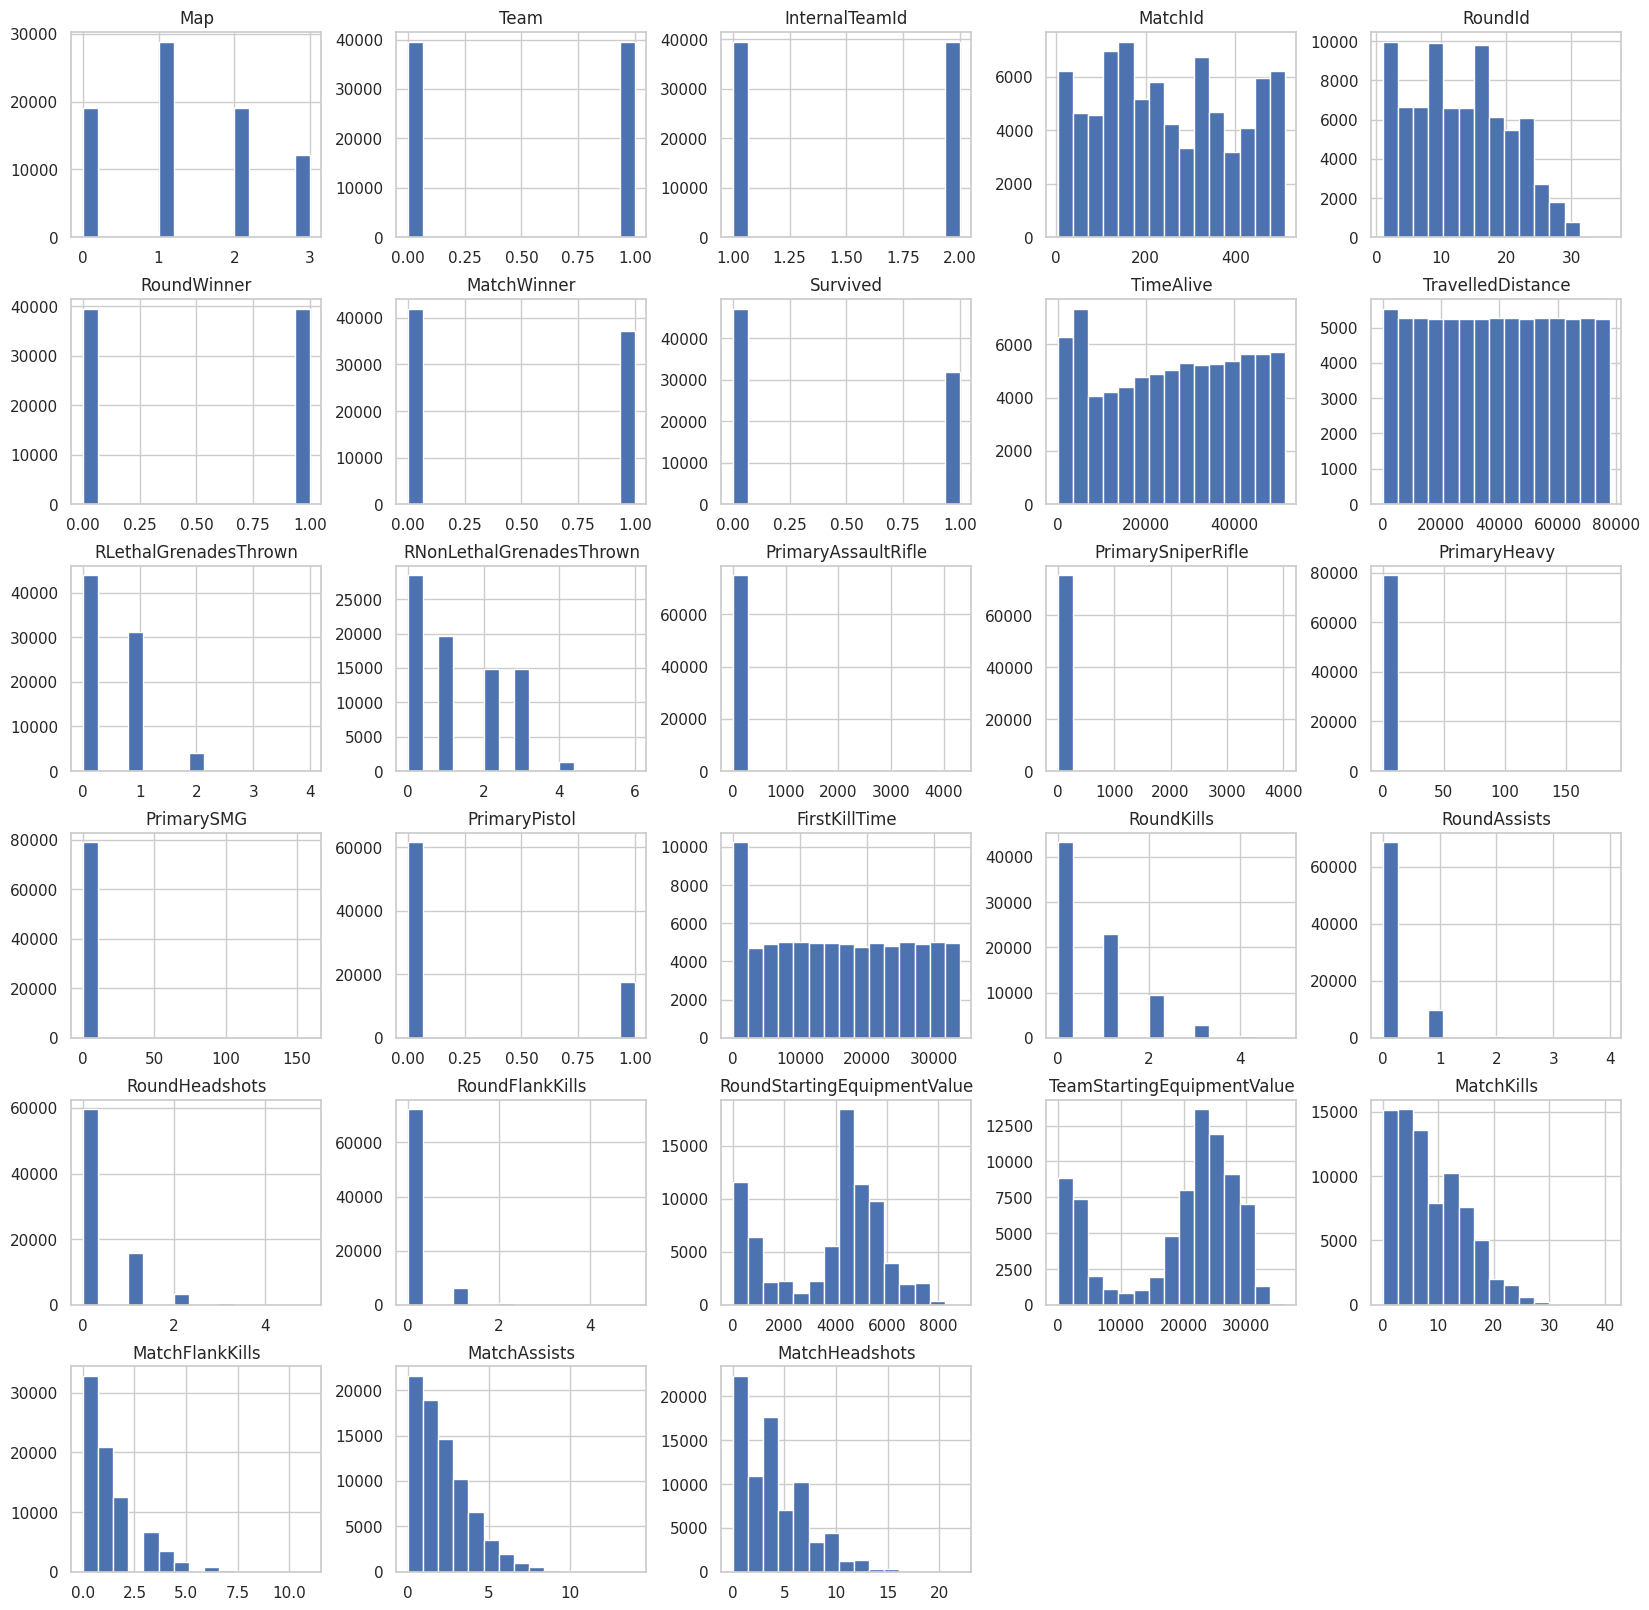

In [ ]:
print("Histogramas para distribuciones de variables")
df.hist(bins=15, figsize=(20, 20))
plt.show()

# Entrenando la data.

In [ ]:
# Lista de modelos
R2_Scores = []
models = ['Linear Regression', 'Decision Tree Regression', 'RandomForest Regression', 'KNeighbours Regression', 'Support Vector Machine Regression']

In [ ]:
# Entrenando data
X = df.drop(['TeamStartingEquipmentValue'], axis=1)
y = df['TeamStartingEquipmentValue']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# Aplicando modelos a la data.

## Linear Regression

###### Regresión lineal ######
Score : 0.8905
[0.8847462  0.88943921 0.88867286 0.8940181  0.8903563 ]

MSE    : 10436545.29 
MAE    : 2290.71 
RMSE   : 3230.56 
R2     : 0.89 


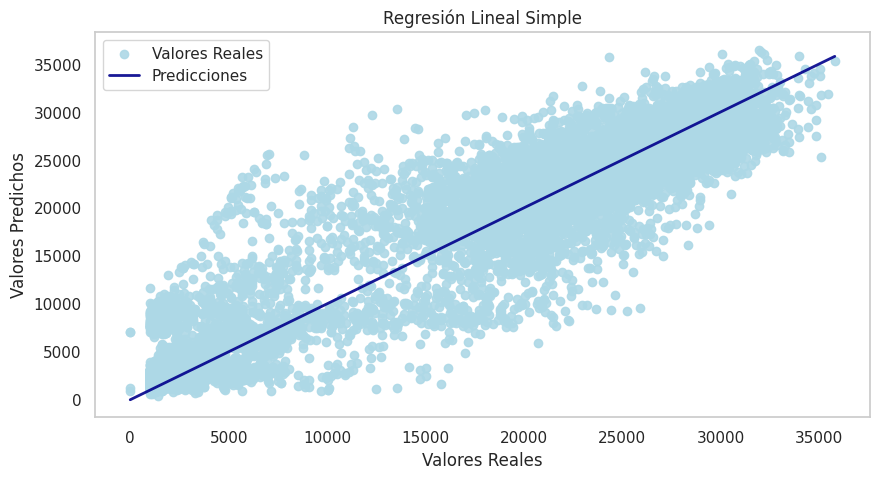

In [ ]:
clf_lr = LinearRegression()
clf_lr.fit(X_train, y_train)
accuracies = cross_val_score(estimator=clf_lr, X=X_train, y=y_train, cv=5, verbose=1)

# Predicciones en el conjunto de prueba
y_pred = clf_lr.predict(X_test)

# Métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)

# Métricas
print('###### Regresión lineal ######')
print('Score : %.4f' % clf_lr.score(X_test, y_test))
print(accuracies)
print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

# Gráfico
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='lightblue', label='Valores Reales', alpha=0.9)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='darkblue', label='Predicciones', linewidth=2, alpha=0.9)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Regresión Lineal Simple')
plt.grid(False)
plt.legend()
plt.show()



## Decision Tree Regression

###### Árbol de Decisión Regresión ######
Score : 0.9104

MSE    : 8542640.54 
MAE    : 1907.60 
RMSE   : 2922.78 
R2     : 0.91 


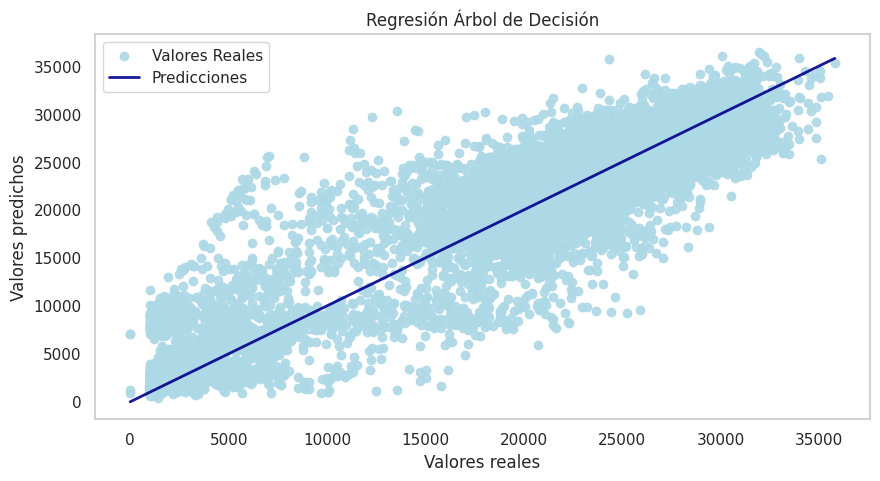

In [ ]:
# Regresión de Árbol de Decisión
clf_dt = DecisionTreeRegressor(max_depth=10)
clf_dt.fit(X_train, y_train)
accuracies_dt = cross_val_score(estimator=clf_dt, X=X_train, y=y_train, cv=5, verbose=1)

# Predicciones en el conjunto de prueba
y_pred_dt = clf_dt.predict(X_test)

# Métricas de evaluación
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = mean_squared_error(y_test, y_pred_dt) ** 0.5
r2_dt = r2_score(y_test, y_pred_dt)

# Métricas
print('###### Árbol de Decisión Regresión ######')
print('Score : %.4f' % clf_dt.score(X_test, y_test))
print('')
print('MSE    : %0.2f ' % mse_dt)
print('MAE    : %0.2f ' % mae_dt)
print('RMSE   : %0.2f ' % rmse_dt)
print('R2     : %0.2f ' % r2_dt)

# Gráfico
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='lightblue', label='Valores Reales', alpha=0.9)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='darkblue', label='Predicciones', linewidth=2, alpha=0.9)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Regresión Árbol de Decisión')
plt.legend()
plt.grid(False)
plt.show()


## RandomForest Regression

###### Random Forest ######
Score : 0.9229
[0.91658778 0.92062837 0.91919075 0.92170018 0.92272641]

MSE    : 7348901.98 
MAE    : 1792.38 
RMSE   : 2710.89 
R2     : 0.92 


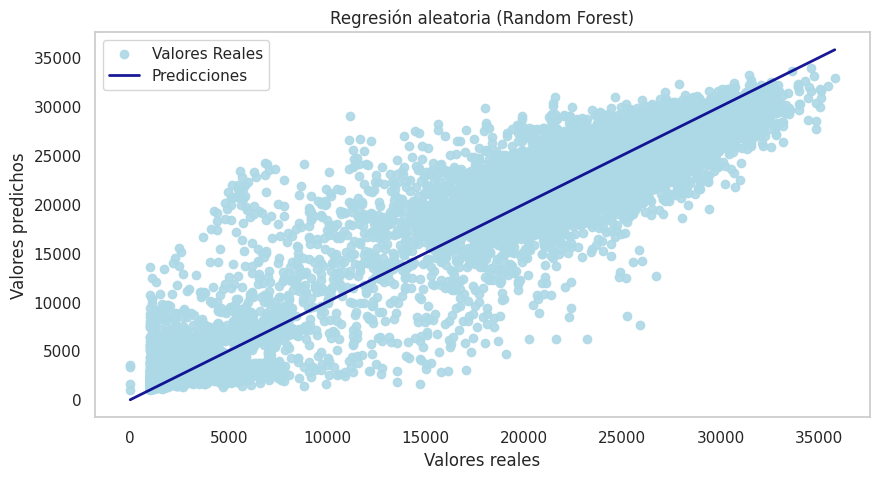

In [ ]:
# Regresión aleatoria (Random Forest)
clf_rf = RandomForestRegressor()
clf_rf.fit(X_train, y_train)
accuracies = cross_val_score(estimator=clf_rf, X=X_train, y=y_train, cv=5, verbose=1)

# Predicciones en el conjunto de prueba
y_pred = clf_rf.predict(X_test)

# Métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)

# Métricas
print('###### Random Forest ######')
print('Score : %.4f' % clf_rf.score(X_test, y_test))
print(accuracies)
print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

# Gráfico
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='lightblue', label='Valores Reales', alpha=0.9)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='darkblue', label='Predicciones', linewidth=2, alpha=0.9)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Regresión aleatoria (Random Forest)')
plt.legend()
plt.grid(False)
plt.show()

## KNeighbours Regression

###### Regresión KNN ######
Score : 0.8216

MSE    : 17004815.26 
MAE    : 2979.44 
RMSE   : 4123.69 
R2     : 0.82 


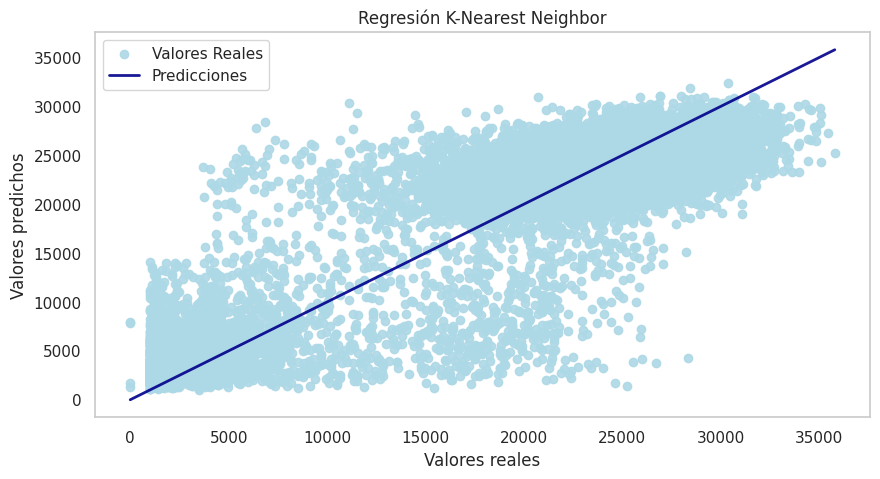

In [ ]:
# Regresión KNN
clf_knn = KNeighborsRegressor(n_neighbors=5)  # KNN según necesidad
clf_knn.fit(X_train, y_train)
accuracies_knn = cross_val_score(estimator=clf_knn, X=X_train, y=y_train, cv=5, verbose=1)

# Predicciones en el conjunto de prueba
y_pred = clf_knn.predict(X_test)

# Métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)

# Métricas
print('###### Regresión KNN ######')
print('Score : %.4f' % clf_knn.score(X_test, y_test))  # Corregir esta línea
print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

# Gráfico
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='lightblue', label='Valores Reales', alpha=0.9)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='darkblue', label='Predicciones', linewidth=2, alpha=0.9)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Regresión K-Nearest Neighbor')
plt.grid(False)
plt.legend()
plt.show()

## Support Vector Machine Regression

In [ ]:
# Modelo de Regresión SVM
clf_svm = SVR(kernel='linear')  # Kernel SVM
clf_svm.fit(X_train, y_train)
accuracies_svm = cross_val_score(estimator=clf_svm, X=X_train, y=y_train, cv=5, verbose=1)

# Predicciones en el conjunto de prueba
y_pred_svm = clf_svm.predict(X_test)

# Métricas de evaluación
mse_svm = mean_squared_error(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
rmse_svm = mean_squared_error(y_test, y_pred_svm) ** 0.5
r2_svm = r2_score(y_test, y_pred_svm)

# Métricas
print('###### SVM Regresión ######')
print('Score : %.4f' % clf_svm.score(X_test, y_test))
print('')
print('MSE    : %0.2f ' % mse_svm)
print('MAE    : %0.2f ' % mae_svm)
print('RMSE   : %0.2f ' % rmse_svm)
print('R2     : %0.2f ' % r2_svm)

# Gráfico
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='lightblue', label='Valores Reales', alpha=0.9)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='darkblue', label='Predicciones', linewidth=2, alpha=0.9)
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.title('Regresión SVM')
plt.legend()
plt.grid(False)
plt.show()

# Puntaje de los Modelos.

El modelo que tenga el menor MSE, MAE y RMSE, y el mayor R2, será el mejor según estas métricas.

* ***MSE (Error Cuadrático Medio):*** Mide la diferencia promedio entre los valores reales y los valores predichos por el modelo, elevada al cuadrado. Un MSE menor indica un modelo con menos variabilidad en los residuos.

* ***MAE (Error Absoluto Medio):*** Mide la diferencia promedio entre los valores reales y los valores predichos por el modelo, en valor absoluto. Un MAE menor indica un modelo con menos error en las predicciones.

* ***RMSE (Raíz del Error Cuadrático Medio):*** Es la raíz cuadrada del MSE y tiene la misma unidad que la variable dependiente. Un RMSE menor indica un modelo con menos desviación estándar en los residuos.

* ***R2 (Coeficiente de Determinación):*** Mide la proporción de la variación de la variable dependiente que es explicada por el modelo. Varía entre 0 y 1, siendo 1 el valor óptimo. Un R2 mayor indica un modelo con más poder predictivo.

## Comparación de las metricas.

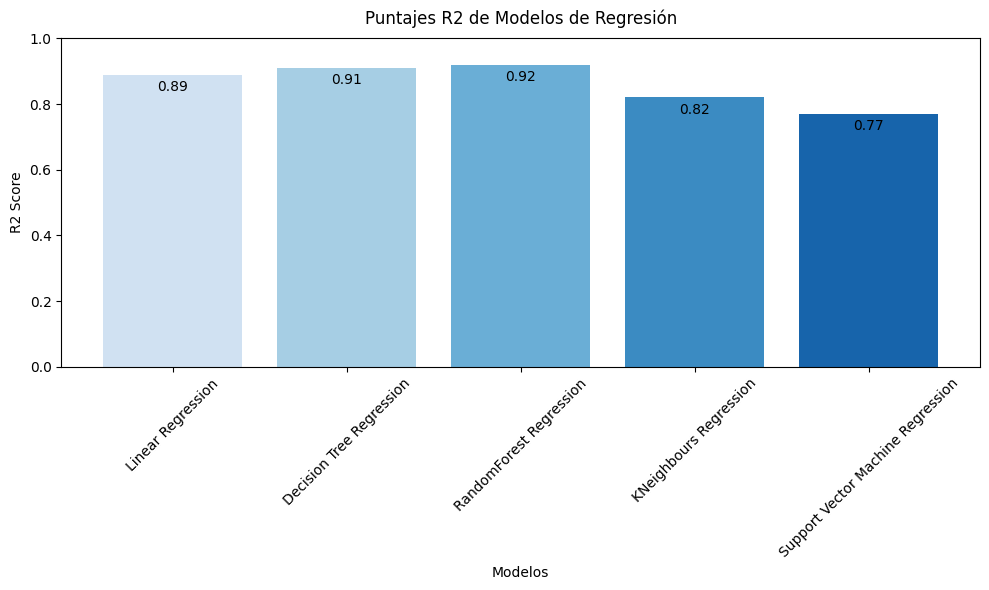

In [ ]:
# Modelos
models = ['Linear Regression', 'Decision Tree Regression', 'RandomForest Regression', 'KNeighbours Regression', 'Support Vector Machine Regression']

# R2 correspondientes
R2_Scores = [0.89, 0.91, 0.92, 0.82, 0.77]

# Colores para las barras
colors = plt.cm.Blues(np.linspace(0.2, 0.8, len(models)))

# Visualización de R2
plt.figure(figsize=(10, 6))
bars = plt.bar(models, R2_Scores, color=colors)
plt.title('Puntajes R2 de Modelos de Regresión', pad=10)  # Ajusta el espaciado del título
plt.xlabel('Modelos')
plt.ylabel('R2 Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()  # Ajusta el espaciado en el gráfico

# Agregar etiquetas con los valores de R2 encima de las barras
for bar, score in zip(bars, R2_Scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f'{score:.2f}', ha='center')

plt.show()

# Conclusiones.


* El modelo de regresión lineal presentado muestra un coeficiente de determinación (R²) de 0.89, lo cual indica que puede explicar aproximadamente el 89% de la variabilidad en los datos dependientes a partir de la variable independiente. A pesar de este alto valor de R², los valores de error cuadrático medio (MSE) y error absoluto medio (MAE) son considerables, lo que sugiere que el modelo no predice con exactitud en todos los casos y podría beneficiarse de una revisión. Las diferencias entre los valores reales y las predicciones, visibles en la dispersión de los puntos alrededor de la línea de regresión, confirman la presencia de variabilidad en las predicciones. Por lo tanto, aunque el modelo es capaz de capturar una porción significativa de la información, existe espacio para mejorar su precisión y reducir los errores en las predicciones futuras.
---
* El modelo de regresión utilizando Árbol de Decisión muestra un coeficiente de determinación (R²) de 0.91, lo que indica que el modelo puede explicar el 91% de la variabilidad de los datos. Los valores de MSE y MAE son menores en comparación con el modelo de regresión lineal anterior, lo que sugiere un mejor ajuste y una menor variabilidad en las predicciones. Además, el RMSE también es ligeramente inferior, indicando que las predicciones son, en promedio, más cercanas a los valores reales. No obstante, aunque el desempeño del modelo es bueno, los puntos dispersos alrededor de la línea de predicción muestran que hay margen para optimizar y posiblemente mejorar el modelo para alcanzar predicciones más precisas.
---
* El modelo de regresión basado en Random Forest muestra un coeficiente de determinación (R²) de 0.92, lo que implica que puede explicar el 92% de la variabilidad en el conjunto de datos. Comparado con los modelos anteriores, este presenta el menor error cuadrático medio (MSE) y el menor error absoluto medio (MAE), así como el menor error cuadrático medio raíz (RMSE), lo que sugiere que tiene un ajuste más preciso y consistente a los datos. La menor dispersión de los puntos alrededor de la línea de predicción también refleja una mejora en la capacidad del modelo para predecir los valores reales. Este rendimiento indica que el modelo de Random Forest es más robusto y puede ser más confiable para realizar predicciones en comparación con los modelos de regresión lineal simple y Árbol de Decisión previamente examinados.
---
* El modelo de regresión K-Nearest Neighbor (KNN) presenta un coeficiente de determinación (R²) de 0.82, lo que señala que puede explicar un 82% de la variabilidad de los datos. No obstante, el modelo tiene los valores más altos de error cuadrático medio (MSE) y error absoluto medio (MAE), así como el mayor error cuadrático medio raíz (RMSE) entre los modelos analizados, indicando que sus predicciones son las menos precisas y que hay una variabilidad considerable en sus resultados. La dispersión de los puntos alrededor de la línea de regresión sugiere una menor consistencia en las predicciones comparado con los modelos de Árbol de Decisión y Random Forest. En resumen, el modelo KNN muestra un potencial de ajuste más bajo y precisaría de una mayor optimización para mejorar su capacidad predictiva.
---
* El modelo de regresión de máquina de vectores de soporte tiene el mayor MSE y el mayor MAE de todos los modelos, lo que indica que tiene un ajuste muy malo y una alta variabilidad en sus predicciones. Su R2 es de 0.77, lo que significa que explica el 77% de la variación de los datos, lo que es insuficiente. Este modelo parece ser el peor de todos los que has probado.

## El mejor modelo evaluado:

* Basándome en los coeficientes de determinación (R²) y los valores de MSE, MAE y RMSE proporcionados para cada uno de los modelos evaluados, el modelo de regresión Random Forest es el que presenta el mejor rendimiento. Tiene el mayor R² de 0.92, lo que indica que explica el 92% de la variabilidad de los datos, y también los menores valores en las métricas de error (MSE, MAE y RMSE), sugiriendo que las predicciones son más cercanas a los valores reales en comparación con los otros modelos.

* El mejor modelo evaluado es el de Random Forest no solo muestra una mayor capacidad para capturar la variabilidad en los datos sino que también proporciona las predicciones más precisas y consistentes entre los modelos considerados.



Paso 1: Guardar el Modelo Entrenado


```
# Esto tiene formato de código
import joblib

# Suponiendo que clf_rf es tu modelo de Random Forest entrenado
joblib.dump(clf_rf, 'modelo_random_forest.pkl')


```

<h3>Paso 2</h3>: Crear una Aplicación Web Simple con Flask
Primero, instala Flask si aún no lo has hecho:





```
#pip install flask
```


Luego, crea un archivo app.py con el siguiente contenido:



```
from flask import Flask, request, jsonify
import joblib
import numpy as np

app = Flask(__name__)

# Cargar el modelo de Random Forest
modelo = joblib.load('modelo_random_forest.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    datos_json = request.get_json(force=True)
    # Asegúrate de convertir los datos de entrada en el formato correcto
    # Aquí se asume que datos_json es una lista de listas
    prediction = modelo.predict(np.array(datos_json['features']))
    return jsonify({'prediccion': prediction.tolist()})

if __name__ == '__main__':
    app.run(debug=True)
```



Este código asume que los datos de entrada para hacer la predicción se envían en el formato JSON y que la clave 'features' contiene las características necesarias para hacer la predicción.
<h3>Paso 3</3>: Contenedorizar la Aplicación
Para contenedorizar la aplicación, necesitarás Docker. A continuación se muestra cómo crear un Dockerfile:

Dockerfile

```
FROM python:3.8

WORKDIR /app

COPY . /app

RUN pip install -r requirements.txt

EXPOSE 5000

CMD ["python", "app.py"]
```


Y crea un archivo requirements.txt con las dependencias de tu aplicación, incluyendo Flask y joblib:




```
flask
joblib
numpy
```


Luego, construye y ejecuta tu contenedor Docker:


```
docker build -t modelo-random-forest .
docker run -p 5000:5000 modelo-random-forest
```
<h3>Paso 4</h3>: Desplegar el Contenedor
Finalmente, puedes desplegar tu contenedor en un servicio en la nube que soporte contenedores, como AWS ECS, Azure Container Instances o Google Cloud Run. El proceso específico dependerá del proveedor de servicios en la nube que elijas.

Recuerda que este es un ejemplo simplificado y que el despliegue en un entorno de producción real puede requerir pasos adicionales, como la configuración de seguridad, manejo de dependencias, escalabilidad, monitoreo y más.